In [1]:
import matplotlib.pyplot as plt
import rsatoolbox as rsa
import os
import globals as gl
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from scipy.stats import pearsonr
import PcmPy as pcm

plt.style.use('default')

Base directory found: /cifs/diedrichsen/data/Chord_exp/EFC_learningfMRI
Atlas directory found: /cifs/diedrichsen/data/Atlas_templates/fs_LR_32


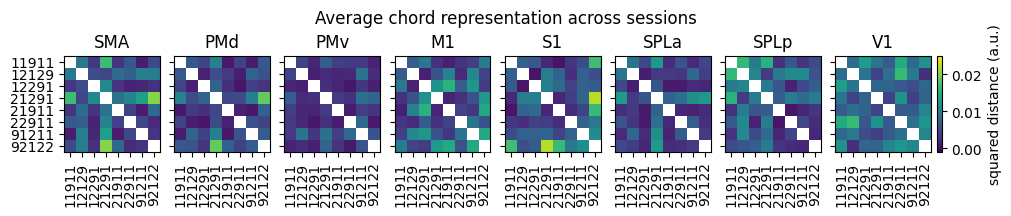

In [2]:
experiment = 'efc4'
vmin, vmax = -.001, .025
sn=101

Hem= 'L'
glm = 1
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']

fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(10, 2), constrained_layout=True)

for r, roi in enumerate(rois):

    ax = axs[r]

    rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir, gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))
    conds = rdms.pattern_descriptors['conds']

    rdm = []
    for day in [3, 9, 23]:
        conds = [f'{day:02d},{chordID}' for chordID in gl.chordID]
        rdm_tmp = rdms.subset(by='ROI', value=roi)
        rdm_tmp = rdm_tmp.subset_pattern(by='conds', value=conds)
        rdm_tmp.pattern_descriptors['conds'] = [c.split(',')[1] for c in rdm_tmp.pattern_descriptors['conds']]
        rdm.append(rdm_tmp)

    rdm = rsa.rdm.rdms.concat(rdm).mean()

    cax = rsa.vis.show_rdm_panel(
            rdm, ax, cmap='viridis', vmin=vmin, vmax=vmax
        )

    ax.set_xticks(np.arange(len(rdm.pattern_descriptors['conds'])))
    ax.set_xticklabels(rdm.pattern_descriptors['conds'], rotation=90, ha='center')
    ax.set_yticks(ax.get_xticks())
    ax.set_yticklabels(rdm.pattern_descriptors['conds'])

    ax.set_title(roi)

cbar = fig.colorbar(cax, ax=ax, orientation='vertical', fraction=.05)
cbar.set_label('squared distance (a.u.)')

fig.suptitle('Average chord representation across sessions')

plt.show()


[Text(0, 0, 'thumb'),
 Text(1, 0, 'index'),
 Text(2, 0, 'middle'),
 Text(3, 0, 'ring'),
 Text(4, 0, 'pinkie')]

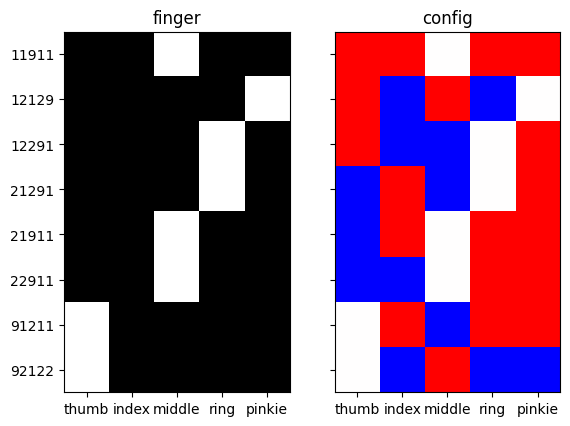

In [3]:
finger = np.zeros((8, 5))
finger[0] = np.array([1, 1, 0, 1, 1]) # 11911
finger[1] = np.array([1, 1, 1, 1, 0]) # 12129
finger[2] = np.array([1, 1, 1, 0, 1]) # 12291
finger[3] = np.array([1, 1, 1, 0, 1]) # 21291
finger[4] = np.array([1, 1, 0, 1, 1]) # 21911
finger[5] = np.array([1, 1, 0, 1, 1]) # 22911
finger[6] = np.array([0, 1, 1, 1, 1]) # 91211
finger[7] = np.array([0, 1, 1, 1, 1]) # 92122

config = np.zeros((8, 5))
config[0] = np.array([1, 1, 0, 1, 1])  # 11911
config[1] = np.array([1, -1, 1, -1, 0])  # 12129
config[2] = np.array([1, -1, -1, 0, 1])  # 12291
config[3] = np.array([-1, 1, -1, 0, 1])  # 21291
config[4] = np.array([-1, 1, 0, 1, 1])  # 21911
config[5] = np.array([-1, -1, 0, 1, 1])  # 22911
config[6] = np.array([0, 1, -1, 1, 1])  # 91211
config[7] = np.array([0, -1, 1, -1, -1])  # 92122

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, )

axs[0].imshow(finger, cmap='Greys')
axs[0].set_title('finger')
axs[0].set_xticks(np.arange(5))
axs[0].set_yticks(np.arange(8))
axs[0].set_xticklabels(['thumb', 'index', 'middle', 'ring', 'pinkie'])
axs[0].set_yticklabels(gl.chordID)

axs[1].imshow(config, cmap='bwr')
axs[1].set_title('config')
axs[1].set_xticks(np.arange(5))
axs[1].set_xticklabels(['thumb', 'index', 'middle', 'ring', 'pinkie'])

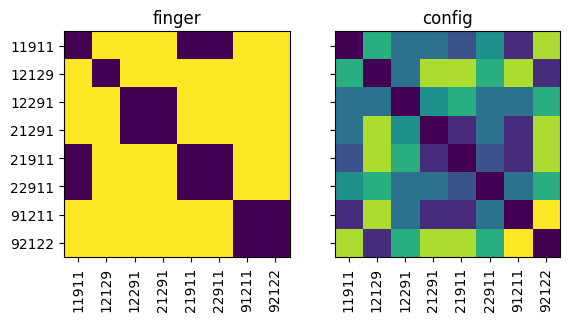

In [4]:
f = open(os.path.join(gl.baseDir, gl.pcmDir, f'models.p'), "rb")
M  = pickle.load(f)

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, )

i = 0
for m in M:
    if (type(m) is pcm.FixedModel) & (m.name!='null'):
        D = pcm.G_to_dist(m.G)
        axs[i].imshow(D)
        axs[i].set_title(m.name)
        axs[i].set_xticks(np.arange(8))
        axs[i].set_yticks(axs[i].get_xticks())
        axs[i].set_xticklabels(gl.chordID, rotation=90)
        axs[i].set_yticklabels(axs[i].get_xticklabels())

        i += 1


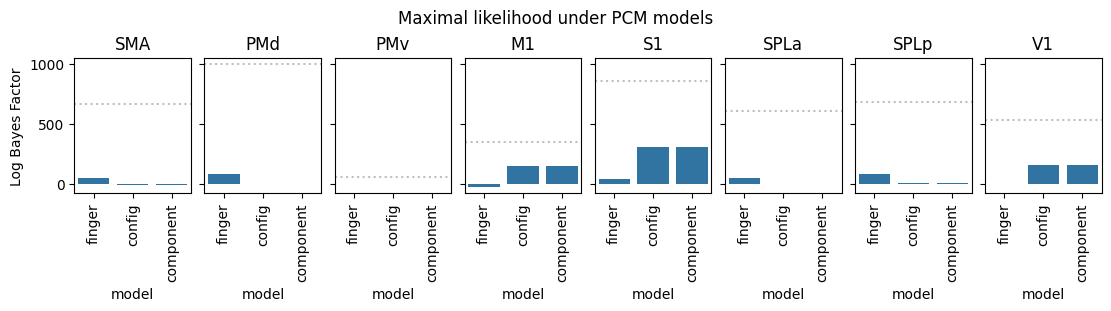

In [7]:
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
glm = 1
H = 'L'

fig, axs = plt.subplots(1, len(rois), figsize=(11, 3), sharex=True, sharey=True, constrained_layout=True)

for r, roi in enumerate(rois):

    T_in = pd.read_pickle(os.path.join(gl.baseDir, gl.pcmDir, f'T_in.glm{glm}.{H}.{roi}.p'))

    plt.sca(axs[r])
    ax = pcm.model_plot(T_in.likelihood,
                    null_model = 'null',
                    noise_ceiling= 'ceil',
                    noise_ceil_col=[0.5, 0.5, 0.5, 0.5])
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(roi)

fig.suptitle('Maximal likelihood under PCM models')

plt.show()